<a href="https://colab.research.google.com/github/abhi-nowww/Classify-Images-Overlapped-With-Text/blob/main/AI_Moudule_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Developing AI module That Create an AI module that classifies whether a creative has image and text overlap or not. 



In [ ]:
# Importing Packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import Model
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [ ]:
train = ImageDataGenerator(rescale= 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True
                          )
validation = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset  = train.flow_from_directory('/content/drive/MyDrive/sampleimages/trainimg/',
                                          target_size = (600,600),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset  = validation.flow_from_directory('/content/drive/MyDrive/sampleimages/testimg/',
                                          target_size = (600,600),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'lap': 0, 'nolap': 1}

In [ ]:
# CNN Model
model =  tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu' , input_shape = (600,600,3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #Another Convolutional Layer
                                       tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #Another Convolutional Layer
                                     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #Flatten
                                     tf.keras.layers.Flatten(),
                                     #Applying 2 Dense Layer
                                     tf.keras.layers.Dense(512 , activation = 'relu'),
                                     tf.keras.layers.Dense(1 , activation = 'sigmoid')
     
])

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(lr = 0.001),
             metrics  = ['accuracy'])

In [ ]:
model.fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs =  50,
                     validation_data = validation_dataset
                     )

Epoch 1/50
3/3 [==============================] - 24s 4s/step - loss: 42.7842 - accuracy: 0.7500 - val_loss: 3.9304 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 1s 442ms/step - loss: 3.8919 - accuracy: 0.5000 - val_loss: 0.9448 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 2s 673ms/step - loss: 0.8577 - accuracy: 0.7500 - val_loss: 1.1321 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 2s 678ms/step - loss: 0.8162 - accuracy: 0.5000 - val_loss: 0.6387 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 1s 434ms/step - loss: 0.6530 - accuracy: 0.5000 - val_loss: 0.6823 - val_accuracy: 0.6250
Epoch 6/50
3/3 [==============================] - 1s 441ms/step - loss: 0.6889 - accuracy: 0.6250 - val_loss: 0.6432 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 1s 434ms/step - loss: 0.6576 - accuracy: 0.5000 - val_loss: 0.6284 - val_accuracy: 0.6250
Epoch 8/50
3/3 [=====

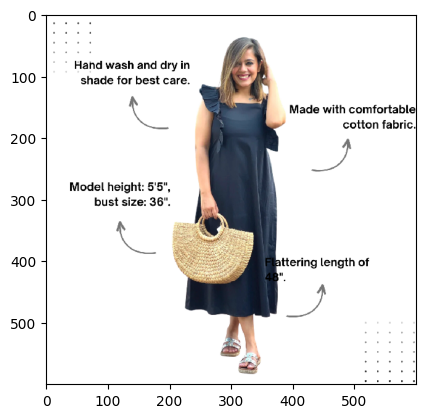

1/1 [==============================] - 0s 285ms/step
Images Are Overlapped With Text


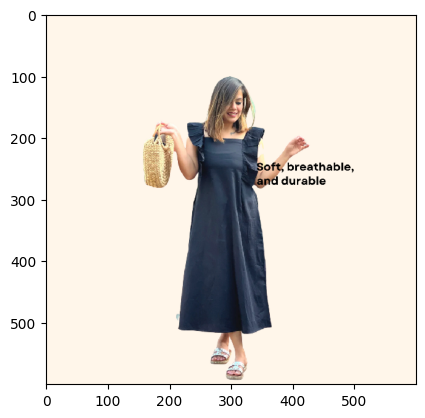

1/1 [==============================] - 0s 35ms/step
Images Are Overlapped With Text


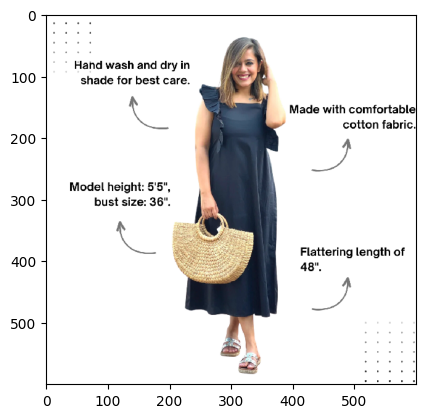

1/1 [==============================] - 0s 34ms/step
Images Are Overlapped With Text


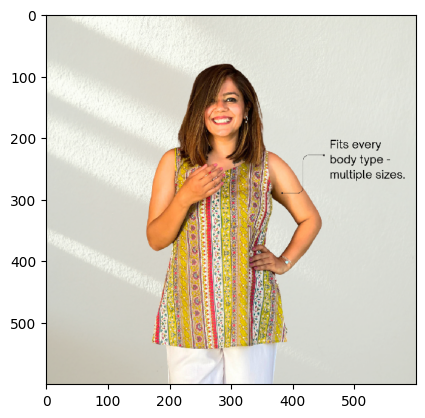

1/1 [==============================] - 0s 61ms/step
Images Are Overlapped With Text


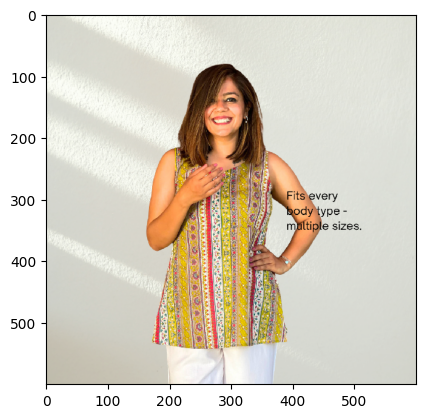

1/1 [==============================] - 0s 26ms/step
Images Are Overlapped With Text


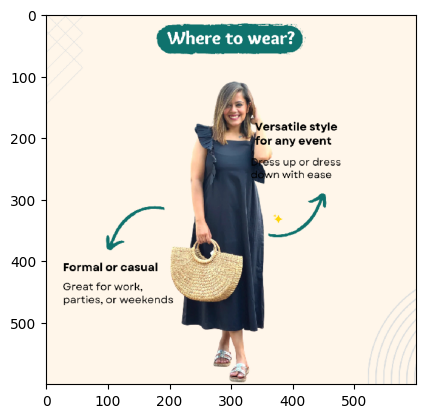

1/1 [==============================] - 0s 23ms/step
Images Are Overlapped With Text


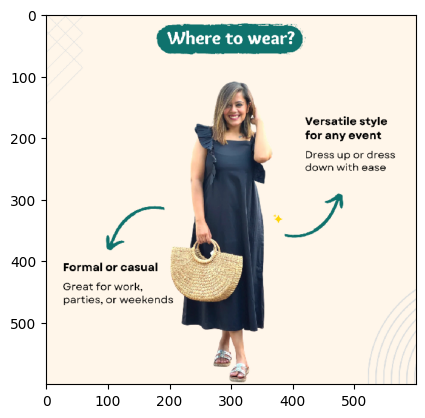

1/1 [==============================] - 0s 25ms/step
Images And Text Are Not Overlapped With Each


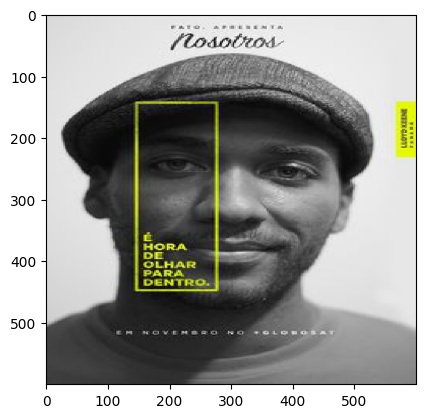

1/1 [==============================] - 0s 22ms/step
Images Are Overlapped With Text


In [ ]:
dir_path = '/content/drive/MyDrive/Images'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i , target_size = (600,600))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images  = np.vstack([X])
    val = model.predict(images)
    if val ==0:
        print("Images Are Overlapped With Text")
    else:
        print("Images And Text Are Not Overlapped With Each")